In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [74]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
train_samples = 56000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=train_samples, test_size=14000)

In [3]:
def cross_validation(classifier, X, y, k, shuffle=False):
    kf = KFold(n_splits=k, shuffle=shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list

In [4]:
def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_validation(classifier, X_train, y_train, 5)
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    
    mean_accuracy = accuracy / len(accuracy_list)
    print(accuracy_list)
    best_classifier = trained_classifier[np.argmax(accuracy_list)]
    return best_classifier, mean_accuracy

In [5]:
def compare_result(X, y):
    fig, axes = plt.subplots(nrows=1, ncols=len(y[:7]), figsize = (15, 5))
    for ax, image, label in zip(axes, X[:7], y[:7]):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
        ax.set_title("Predicted: %s" % str(label))

In [6]:
def show_array(x):
    ncols = 6
    nrows = len(x) // ncols + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (15, 5))
    print(ncols, nrows)
    for ax, image in zip(axes, x):
#         ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)

In [5]:
best_classifier, mean_accuracy = check_classifier(KNeighborsClassifier(3), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)

[0.9405, 0.952, 0.9475, 0.936, 0.9425]
0.9511000000000001


In [6]:
print("accuracy: ", accuracy_score(test_y, prediction))

accuracy:  0.9505


In [7]:
best_classifier, mean_accuracy = check_classifier(DecisionTreeClassifier(max_depth=2), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict+(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))

[0.3435, 0.3305, 0.3345, 0.338, 0.3315]
0.3287
accuracy:  0.326


In [8]:
best_classifier, mean_accuracy = check_classifier(DecisionTreeClassifier(max_depth=10), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))

[0.7975, 0.778, 0.809, 0.778, 0.7945]
0.8024000000000001
accuracy:  0.806


In [10]:
best_classifier, mean_accuracy = check_classifier(LogisticRegression(C=0.01, penalty="l1", solver="saga", tol=0.01), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))
l1_coefs = best_classifier.coef_[:][6]
# print("L1 coefs: ", l1_coefs)

[0.9105, 0.899, 0.8935, 0.896, 0.909]
0.8901
accuracy:  0.889


In [11]:
best_classifier, mean_accuracy = check_classifier(LogisticRegression(C=0.01, penalty="l2", solver="saga", tol=0.01), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))
l2_coefs = best_classifier.coef_[:][6]
# print("L2 coefs: ", l2_coefs)

[0.909, 0.9, 0.891, 0.8935, 0.9055]
0.8876999999999999
accuracy:  0.8855


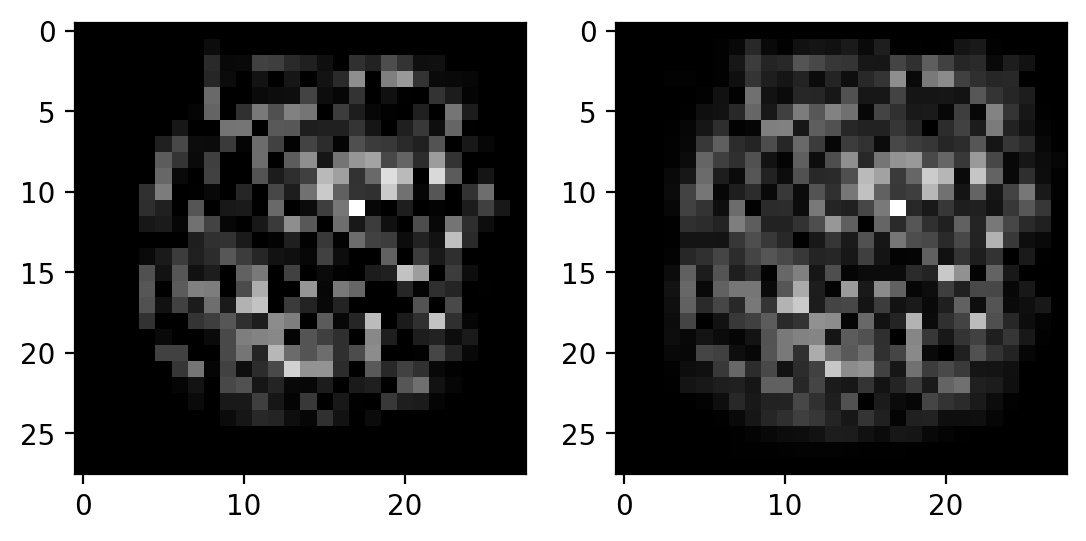

In [12]:
l1_coefs = np.reshape(l1_coefs, (28, 28))
l2_coefs = np.reshape(l2_coefs, (28, 28))

plt.rcParams['figure.dpi']=200
plt.subplot(1,2,1)
plt.imshow(np.abs(l1_coefs), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.abs(l2_coefs), cmap='gray')

In [7]:
best_classifier, mean_accuracy = check_classifier(BernoulliNB(), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))

[0.839, 0.8415, 0.834, 0.8445, 0.831]
0.8234
accuracy:  0.8255


In [13]:
best_classifier, mean_accuracy = check_classifier(SVC(kernel='linear'), train_x, train_y, test_x, test_y)
print(mean_accuracy)
prediction = best_classifier.predict(test_x)
print("accuracy: ", accuracy_score(test_y, prediction))


[0.9105, 0.9115, 0.9115, 0.89, 0.907]
0.9112
accuracy:  0.9055


In [75]:
train_x35 = train_x[(train_y == '3') | (train_y == '5')]
train_y35 = train_y[(train_y == '3') | (train_y == '5')]
test_x35 = test_x[(test_y == '3') | (test_y == '5')]
test_y35 = test_y[(test_y == '3') | (test_y == '5')]
print(train_y35.shape, test_y35.shape)

(10783,) (2671,)


In [56]:
# X_35 = X[(y == '3') | (y == '5')]
# y_35 = y[(y == '3') | (y == '5')]
# print(X_35.shape, y_35.shape)
# train_x35, test_x35, train_y35, test_y35 = train_test_split(X_35, y_35, train_size=10000, test_size=2000)
# print(train_y35.shape, test_y35.shape)

(13454, 784) (13454,)
(10000,) (2000,)


In [58]:
clf_svm, mean_accuracy = check_classifier(SVC(kernel='linear'), train_x35, train_y35, test_x35, test_y35)
print(mean_accuracy)
prediction = clf_svm.predict(test_x35)
print("accuracy: ", accuracy_score(test_y35, prediction))
support_vectors = clf_svm.support_vectors_

[0.9635416666666666, 0.9427083333333334, 0.95822454308094, 0.9530026109660574, 0.9425587467362925]
0.936649214659686
accuracy:  0.9293193717277487


In [ ]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(train_x35, train_y35)
prediction = clf_svm.predict(test_x35)
support_vectors = clf_svm.support_vectors_

In [76]:
support_indices = clf_svm.support_.tolist()
print(len(support_indices))
print("accuracy: ", accuracy_score(test_y35, prediction))

184


ValueError: Found input variables with inconsistent numbers of samples: [2671, 382]

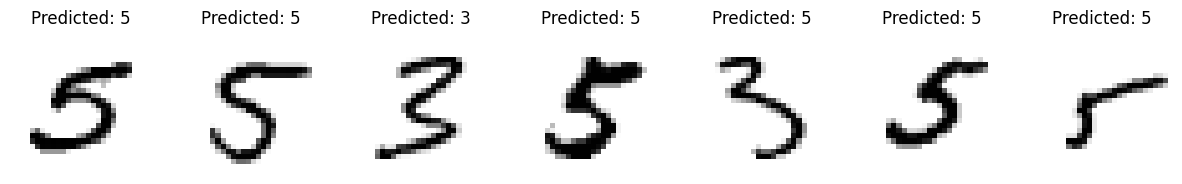

In [60]:
compare_result(test_x35, prediction)

In [61]:
def show_images(x):
    ncols = 10
    nrows = len(x) // ncols + (len(x) % ncols > 0)
    count = 0
    for row in range(1, nrows):
        fig, ax = plt.subplots(1, ncols)
        for col in range(ncols):
            image = x[count]
            ax[col].imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
            ax[col].axis('off')
            count += 1

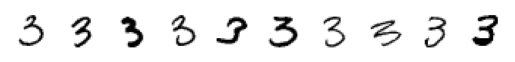

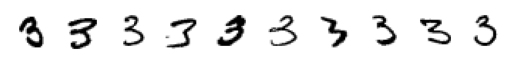

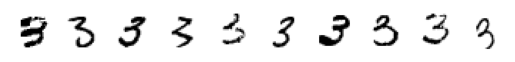

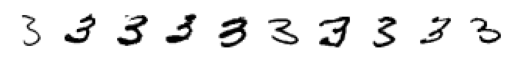

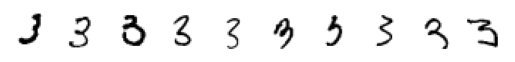

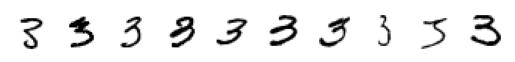

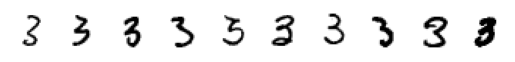

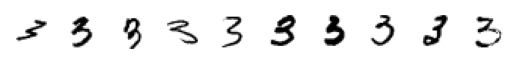

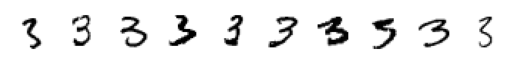

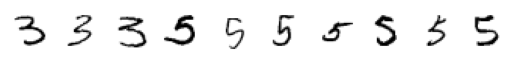

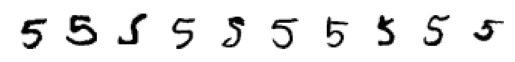

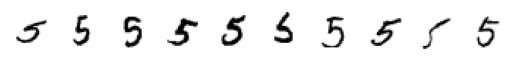

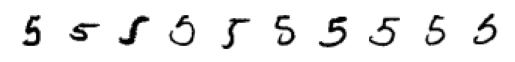

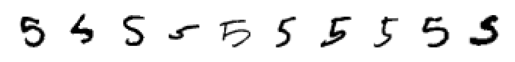

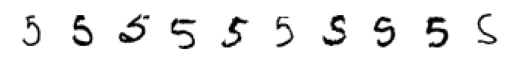

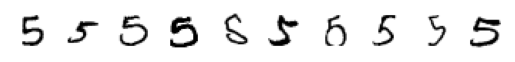

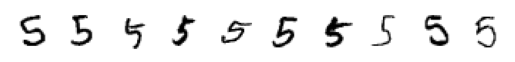

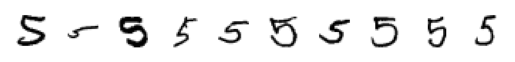

In [62]:
show_images(support_vectors)

In [63]:
feat_cols = [ 'pixel'+str(i) for i in range(X_35.shape[1]) ]

df = pd.DataFrame(X_35,columns=feat_cols)
df['y'] = y_35
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (13454, 786)


In [64]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [65]:
N = 10000

df_subset = df.loc[rndperm[:],:].copy()
data_subset = df_subset[feat_cols].values


In [66]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13454 samples in 0.045s...
[t-SNE] Computed neighbors for 13454 samples in 2.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13454
[t-SNE] Computed conditional probabilities for sample 2000 / 13454
[t-SNE] Computed conditional probabilities for sample 3000 / 13454
[t-SNE] Computed conditional probabilities for sample 4000 / 13454
[t-SNE] Computed conditional probabilities for sample 5000 / 13454
[t-SNE] Computed conditional probabilities for sample 6000 / 13454
[t-SNE] Computed conditional probabilities for sample 7000 / 13454
[t-SNE] Computed conditional probabilities for sample 8000 / 13454
[t-SNE] Computed conditional probabilities for sample 9000 / 13454
[t-SNE] Computed conditional probabilities for sample 10000 / 13454
[t-SNE] Computed conditional probabilities for sample 11000 / 13454
[t-SNE] Computed conditional probabilities for sample 12000 / 13454
[t-SNE] Computed conditional probabilities for sa

In [67]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
threes = df_subset.loc[df['y'] == '3'].copy()
fives = df_subset.loc[df['y'] == '5'].copy()

print('df', len(df))
print('threes', len(threes))
print('fives', len(fives))

df 13454
threes 7141
fives 6313


In [68]:
# print(support_vectors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
print(df_subset['tsne-2d-one'][support_indices].shape)
print(df_subset['tsne-2d-two'][support_indices].shape)

(184,)
(184,)


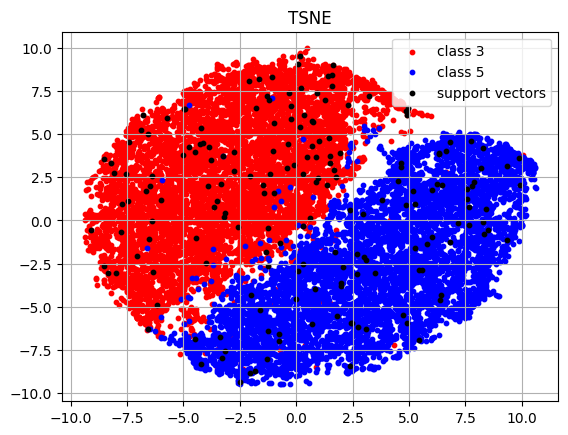

In [70]:
plt.figure(8)
plt.scatter(threes['tsne-2d-one'], threes['tsne-2d-two'], c = 'r', s = 10, label = 'class 3')
plt.scatter(fives['tsne-2d-one'], fives['tsne-2d-two'], c = 'b', s = 10, label = 'class 5')
plt.scatter(df_subset['tsne-2d-one'][support_indices], df_subset['tsne-2d-two'][support_indices], c = 'black', s = 10, label = 'support vectors')
plt.legend()
plt.grid()
plt.title('TSNE')
plt.show()

In [9]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
#     palette=sns.color_palette("hls", 2),
#     data=df_subset,
#     legend="full",
#     alpha=0.9
# )